In [2]:
#Importing essential packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

data = pd.read_csv("/content/cars.csv")
data.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [5]:
data.describe()

,mpg,cylinders,hp,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,106.360153,15.547893,1976.819923
std,7.823570,1.733310,40.499959,2.910625,3.637696
min,10.000000,3.000000,46.000000,8.000000,1971.000000
25%,16.900000,4.000000,75.000000,14.000000,1974.000000
50%,22.000000,6.000000,95.000000,16.000000,1977.000000
75%,28.800000,8.000000,138.000000,17.000000,1980.000000
max,46.600000,8.000000,230.000000,25.000000,1983.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           261 non-null    float64
 1    cylinders    261 non-null    int64  
 2    cubicinches  261 non-null    object 
 3    hp           261 non-null    int64  
 4    weightlbs    261 non-null    object 
 5    time-to-60   261 non-null    int64  
 6    year         261 non-null    int64  
 7    brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [7]:
data.isnull().sum()

,0
mpg,0
cylinders,0
cubicinches,0
hp,0
weightlbs,0
time-to-60,0
year,0
brand,0


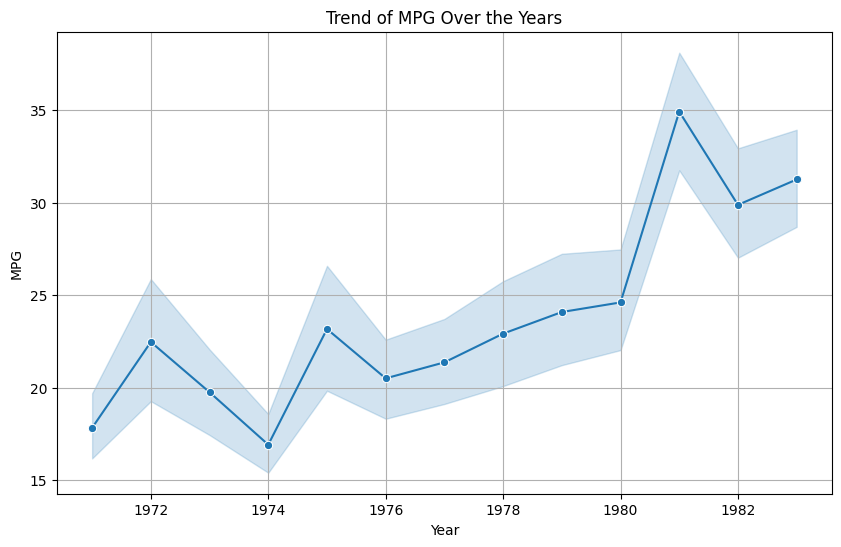

In [17]:
import matplotlib.pyplot as plt

# Assuming your data is in a pandas DataFrame called 'data'
# Assign 'data' to 'df' to avoid NameError
df = data

# Strip leading spaces from column names
df.columns = df.columns.str.strip()

# Create a line plot to show the trend of mpg over the years
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='year', y='mpg', marker='o')
plt.title('Trend of MPG Over the Years')
plt.xlabel('Year')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

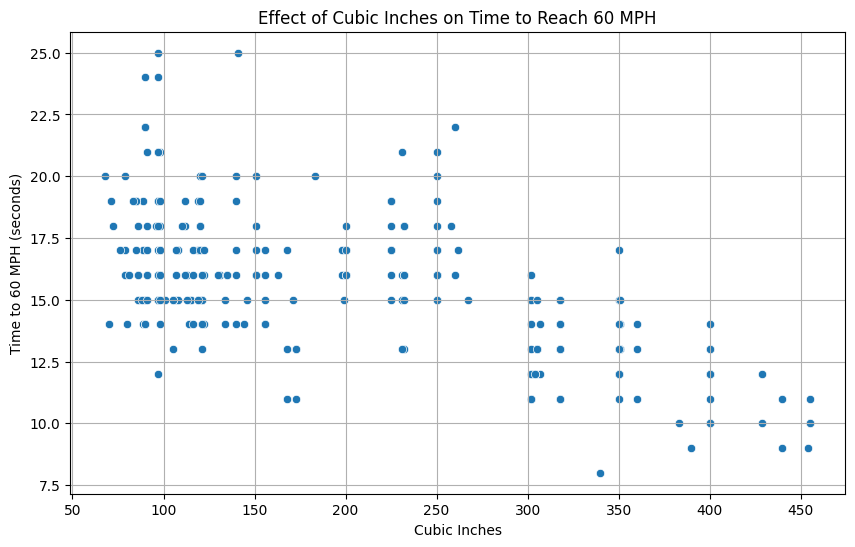

In [18]:
# Convert 'cubicinches' and 'weightlbs' columns to numeric, coercing errors to NaN
df['cubicinches'] = pd.to_numeric(df['cubicinches'], errors='coerce')
df['weightlbs'] = pd.to_numeric(df['weightlbs'], errors='coerce')

# Drop rows with NaN values in 'cubicinches' or 'time-to-60'
df_clean = df.dropna(subset=['cubicinches', 'time-to-60'])

# Create a scatter plot to show the relationship between cubic inches and time-to-60
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='cubicinches', y='time-to-60')
plt.title('Effect of Cubic Inches on Time to Reach 60 MPH')
plt.xlabel('Cubic Inches')
plt.ylabel('Time to 60 MPH (seconds)')
plt.grid(True)
plt.show()

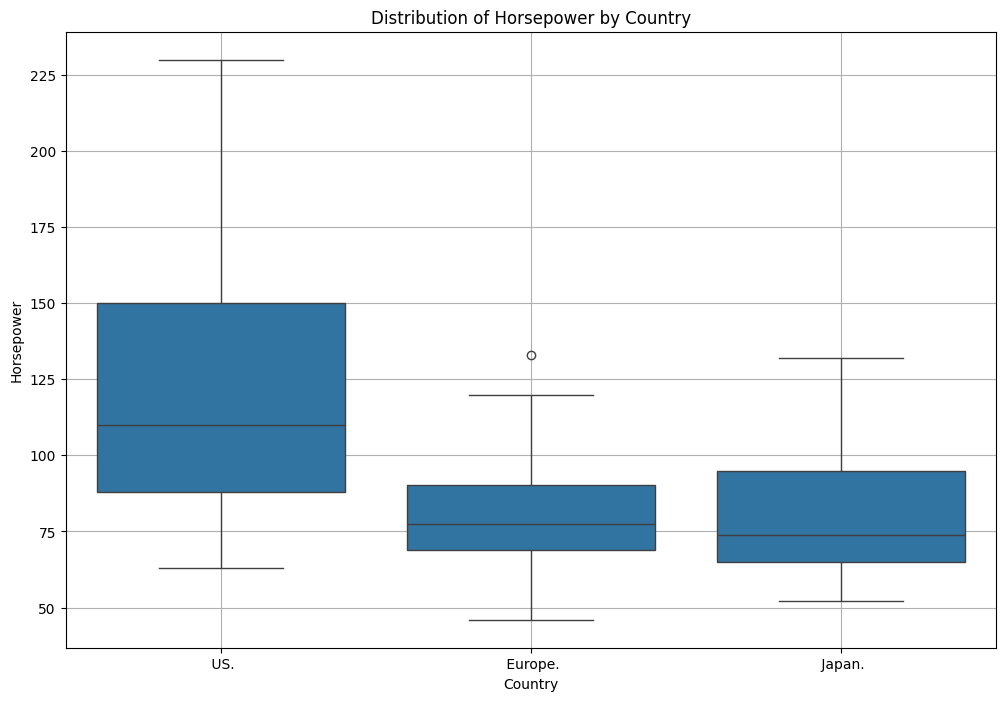

In [19]:
# Create a box plot to show the distribution of horsepower across different countries
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='brand', y='hp')
plt.title('Distribution of Horsepower by Country')
plt.xlabel('Country')
plt.ylabel('Horsepower')
plt.grid(True)
plt.show()

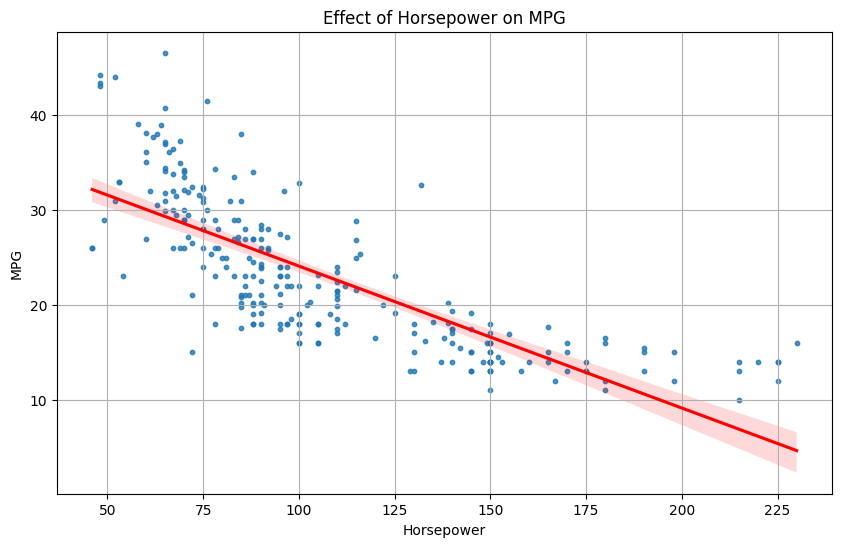

In [20]:
# Create a scatter plot with a regression line to show the relationship between horsepower and mpg
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='hp', y='mpg', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Effect of Horsepower on MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

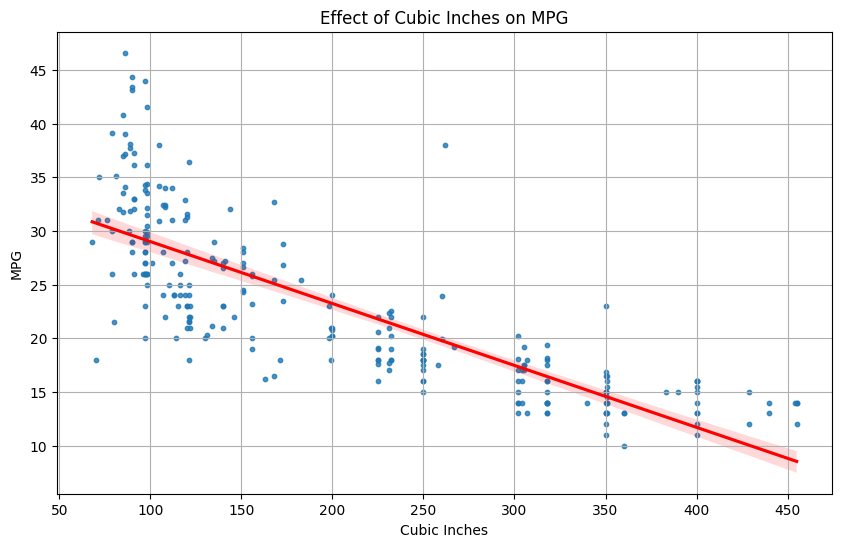

In [21]:
# Create a scatter plot with a regression line to show the relationship between cubic inches and mpg
plt.figure(figsize=(10, 6))
sns.regplot(data=df_clean, x='cubicinches', y='mpg', scatter_kws={'s':10}, line_kws={'color':'red'})
plt.title('Effect of Cubic Inches on MPG')
plt.xlabel('Cubic Inches')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

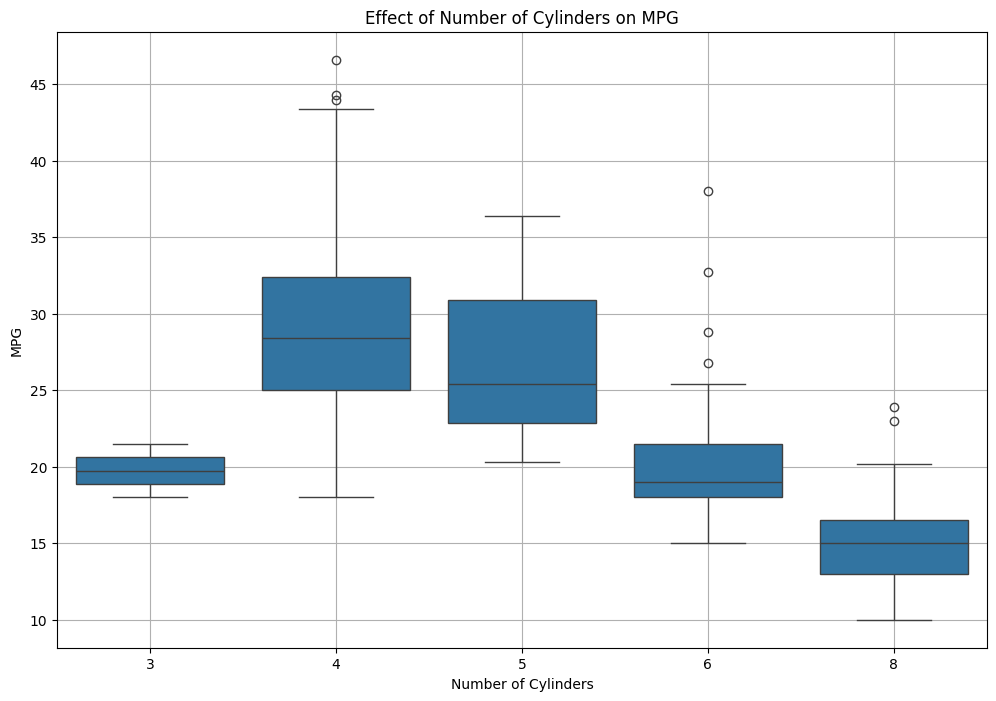

In [22]:
# Create a box plot to show the effect of the number of cylinders on mpg
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='cylinders', y='mpg')
plt.title('Effect of Number of Cylinders on MPG')
plt.xlabel('Number of Cylinders')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

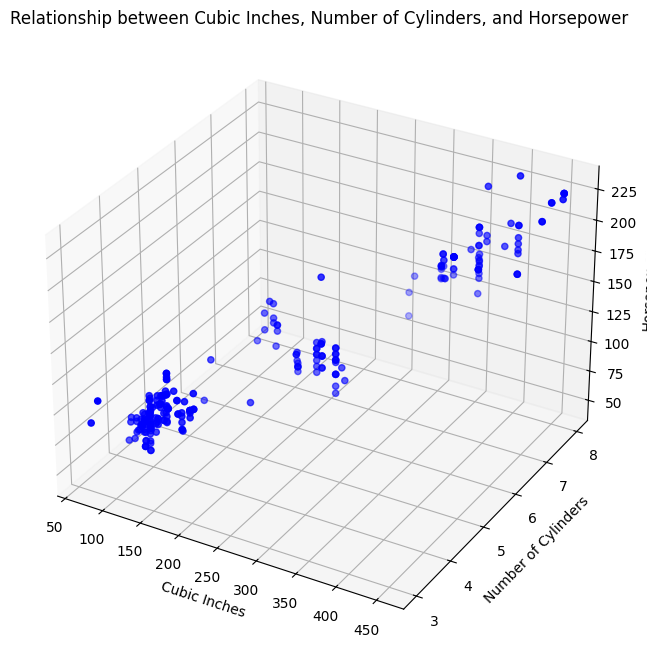

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot to show the relationship between cubic inches, number of cylinders, and horsepower
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df['cubicinches'], df['cylinders'], df['hp'], c='b', marker='o')

# Set labels
ax.set_title('Relationship between Cubic Inches, Number of Cylinders, and Horsepower')
ax.set_xlabel('Cubic Inches')
ax.set_ylabel('Number of Cylinders')
ax.set_zlabel('Horsepower')

plt.show()

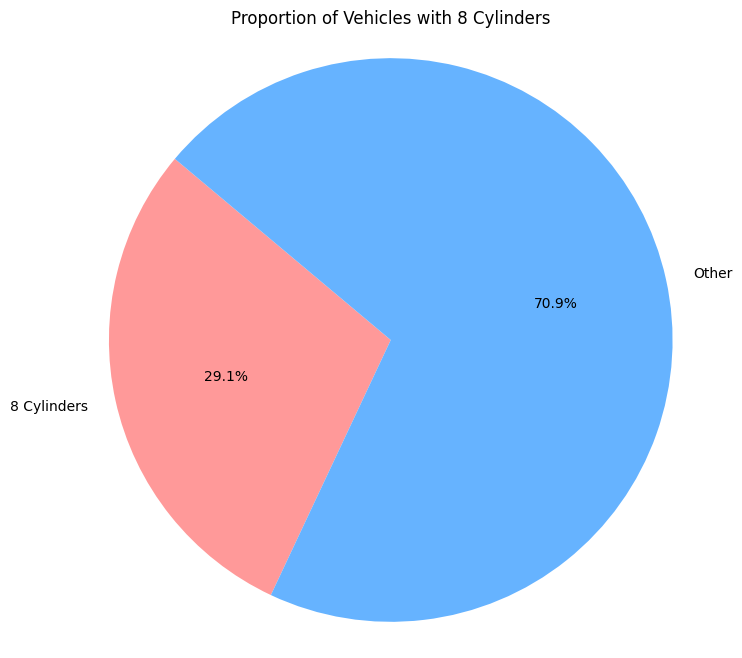

In [24]:
# Calculate the proportion of vehicles with 8 cylinders
cyl_8_count = df[df['cylinders'] == 8].shape[0]
total_count = df.shape[0]
cyl_8_proportion = cyl_8_count / total_count

# Create labels and sizes for the pie chart
labels = ['8 Cylinders', 'Other']
sizes = [cyl_8_proportion, 1 - cyl_8_proportion]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Vehicles with 8 Cylinders')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()